In [32]:
# Import all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from scipy.stats import norm

In [20]:
# Load dataset in dataframe and remove column index number
df=pd.read_csv(r'C:\Users\deepanshu.chakrabort\OneDrive - Wolters Kluwer\Documents\Personal\Learning and development\Data Science projects and assignments\Projects\Amazon Book Review\bestsellers with categories.csv')

In [23]:
# Display the data loaded in the dataframe
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [25]:
# Generate Descriptive Statistics on dataframe
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [24]:
# Get information about dataframe null, non-null, data type etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


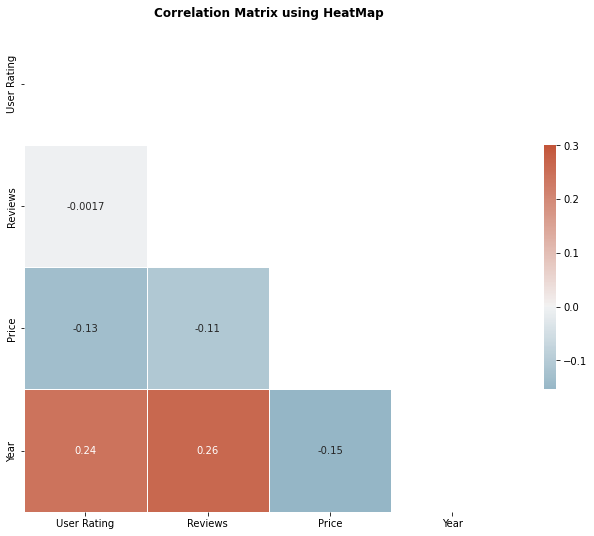

In [6]:
# Correlation Matrix - To find pair wise correlation of each column. 

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(),annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix using HeatMap",fontweight="bold")
plt.show()

### Conclusion after Correlation Matrix
We can clearly see that :
User Rating and Year ; Reviews and Year are positively correlated. 

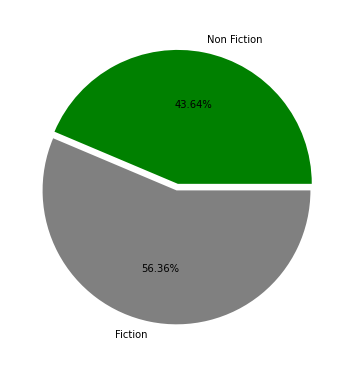

In [7]:
# Find out best selling books based on Genre

plt.figure(figsize=(10,5))
plt.pie(df['Genre'].value_counts().sort_values(),labels=df['Genre'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['Green','grey'])
plt.subplots_adjust(bottom=0, top=0.93, left=0.5, right=1)
fg_color='white'
plt.title("Distribution of Best Selling Books based on Genre",fontweight="bold",color=fg_color)
plt.show()

### Conclusion based on Pie chart 
We can see that the best selling books is from Fiction genre which is 56.36% and Non-fiction genre is 46.34%.

In [8]:
# Getting average user rating over years:
year=df['Year'].unique().tolist()
year.sort()
year

a_year_ur = []
a_nf_ur = []
a_f_ur =[]

year = df['Year'].unique().tolist()
year.sort()

for i in year:
    a = df[df['Year']==i]
    a_nf_ur.append(round(df[(df['Year']==i)&(df['Genre']=='Non Fiction')]['User Rating'].mean(),2))
    a_f_ur.append(round(df[(df['Year']==i)&(df['Genre']=='Fiction')]['User Rating'].mean(),2))
    a_year_ur.append(i)
    
    a_df = {'year': a_year_ur, 'Non Fiction': a_nf_ur, 'Fiction': a_f_ur} 
    a_df = pd.DataFrame(a_df) 
    print(a_df)

   year  Non Fiction  Fiction
0  2009         4.58     4.59
   year  Non Fiction  Fiction
0  2009         4.58     4.59
1  2010         4.52     4.61
   year  Non Fiction  Fiction
0  2009         4.58     4.59
1  2010         4.52     4.61
2  2011         4.51     4.62
   year  Non Fiction  Fiction
0  2009         4.58     4.59
1  2010         4.52     4.61
2  2011         4.51     4.62
3  2012         4.56     4.50
   year  Non Fiction  Fiction
0  2009         4.58     4.59
1  2010         4.52     4.61
2  2011         4.51     4.62
3  2012         4.56     4.50
4  2013         4.56     4.55
   year  Non Fiction  Fiction
0  2009         4.58     4.59
1  2010         4.52     4.61
2  2011         4.51     4.62
3  2012         4.56     4.50
4  2013         4.56     4.55
5  2014         4.61     4.63
   year  Non Fiction  Fiction
0  2009         4.58     4.59
1  2010         4.52     4.61
2  2011         4.51     4.62
3  2012         4.56     4.50
4  2013         4.56     4.55
5  2014   

In [9]:
# Plotting the average user rating over the years for both fiction and non-fiction

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=a_df['year'], y=a_df['Non Fiction'], name='Non Fiction', marker_color='rgb(55, 83, 109)',
                     text=a_df['Non Fiction'], textposition='auto'))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.add_trace(go.Bar(x=a_df['year'], y=a_df['Fiction'], name='Fiction', marker_color='rgb(26, 118, 255)',
                     text=a_df['Fiction'], textposition='auto'))
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')

fig.update_layout(title=dict(text='<b>User rating - Genre wise</b>', x=0.5, y=0.95, font=dict(family="Arial",size=30)),
                  xaxis_title="Year", yaxis_title="Rating", uniformtext_minsize=5,barmode='group', bargap=0.2,
                  bargroupgap=0.2, title_x=0.5)

fig.show()

### Conclusion 
It seems there is not much difference in rating for both fiction and non-fiction books.

In [10]:
# Getting user reviews for both fiction and non-fiction year wise. 

b_year_ur = []
b_nf_ur = []
b_f_ur =[]

year = df['Year'].unique().tolist()
year.sort()

for i in year:
    b = df[df['Year']==i]
    b_nf_ur.append(round(df[(df['Year']==i)&(df['Genre']=='Non Fiction')]['Reviews'].mean()))
    b_f_ur.append(round(df[(df['Year']==i)&(df['Genre']=='Fiction')]['Reviews'].mean()))
    b_year_ur.append(i)
    
    b_df = {'year': b_year_ur, 'Non Fiction': b_nf_ur, 'Fiction': b_f_ur} 
    b_df = pd.DataFrame(b_df) 

In [11]:
# Plotting line graph between years and reviews for both fiction,non fiction genre and total.

b_df['total_reviews'] = b_df['Non Fiction']+b_df['Fiction']
b_df['nf_percent'] = b_df['Non Fiction'].apply(lambda x : 100*x/sum(b_df['Non Fiction']))
b_df['f_percent'] = b_df['Fiction'].apply(lambda x : 100*x/sum(b_df['Fiction']))
b_df['total_reviews_percent'] = b_df['total_reviews'].apply(lambda x : 100*x/sum(b_df['total_reviews']))


t1 = go.Scatter(x=b_df['year'], y=b_df["Non Fiction"], name="Non Fiction", marker=dict(color="#a678de"))
t2 = go.Scatter(x=b_df['year'], y=b_df["Fiction"], name="Fiction", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=b_df['year'], y=b_df["total_reviews"], name="Total Review", marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="<b>Reviews over the years</b>", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.update_layout(xaxis_title="Year", yaxis_title="Number of Reviews",title_x=0.5)
fig.show()

### Conclusion based on the Line chart plotted for reviews over years.
Reviews over the year for the both the genre are showing positive trend till 2018
There is dip in reviews in Fiction Genre from 2015 to 2018 where as its positive for Non Fiction in same time span

In [12]:
# Calculate the number of times author in top 3 for both fiction and non- fiction

# Top3 author from each genre each year
c_year_ur = []
c_nf_ur = []
c_f_ur =[]

year = df['Year'].unique().tolist()
year.sort()

for i in year:
    c = df[df['Year']==i]
    c_nf_ur.append(str(df[(df['Year']==i)&(df['Genre']=='Non Fiction')]['Author'].value_counts().
                       head(3).index.tolist())[1:-1])
    c_f_ur.append(str(df[(df['Year']==i)&(df['Genre']=='Fiction')]['Author'].value_counts().
                      head(3).index.tolist())[1:-1])
    c_year_ur.append(i)
    
    c_df = {'year': c_year_ur, 'Non Fiction': c_nf_ur, 'Fiction': c_f_ur} 
    c_df = pd.DataFrame(c_df) 

In [13]:
c_df['author_name_nf'] = c_df['Non Fiction'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
author_count = []
for i in c_df['author_name_nf']: author_count += i

author_dict = dict((i, author_count.count(i)) for i in author_count)

c_df_author_count = pd.DataFrame(author_dict.values(),author_dict.keys()).reset_index().sort_values(
    0,ascending=False).rename(columns = {'index' : 'author_name_nf', 0 : 'count'})

c_df_author_count['author_name_nf'] = c_df_author_count['author_name_nf'].apply(lambda x :  x.replace("'",''))

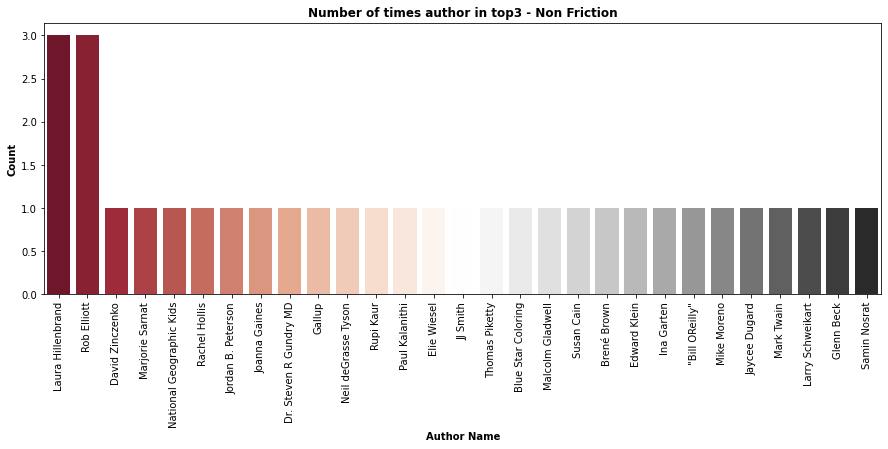

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x='author_name_nf',y='count',data=c_df_author_count,palette="RdGy")
plt.title("Number of times author in top3 - Non Friction",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel('Author Name',fontweight="bold",fontsize=10)
plt.ylabel('Count',fontweight="bold",fontsize=10)
plt.show()

### Conclusion
Number of times author's book are on top3 best selling in Non Fiction Genre for a perticular year
i.e. Rob Elliott's books were in top3 for three years

In [15]:
c_df['author_name_f'] = c_df['Fiction'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
author_count = []
for i in c_df['author_name_f']: author_count += i

author_dict = dict((i, author_count.count(i)) for i in author_count)

c_df_author_count = pd.DataFrame(author_dict.values(),author_dict.keys()).reset_index().sort_values(
    0,ascending=False).rename(columns = {'index' : 'author_name_f', 0 : 'count'})

c_df_author_count['author_name_f'] = c_df_author_count['author_name_f'].apply(lambda x :  x.replace("'",'')) 

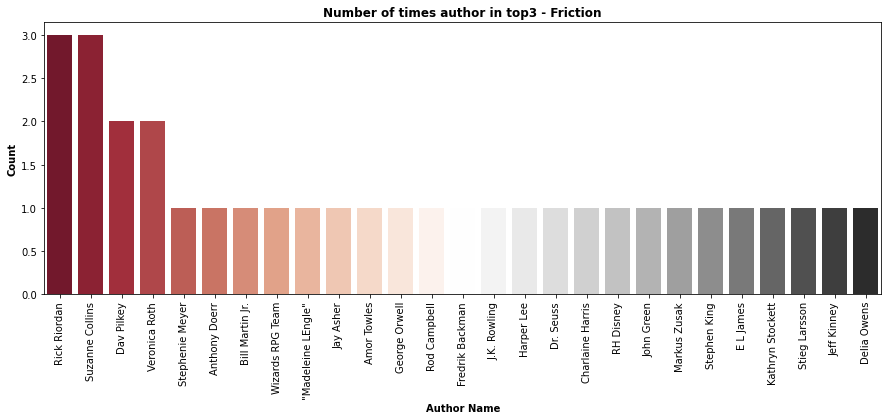

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='author_name_f',y='count',data=c_df_author_count,palette="RdGy")
plt.title("Number of times author in top3 - Friction",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel('Author Name',fontweight="bold",fontsize=10)
plt.ylabel('Count',fontweight="bold",fontsize=10)
plt.show()

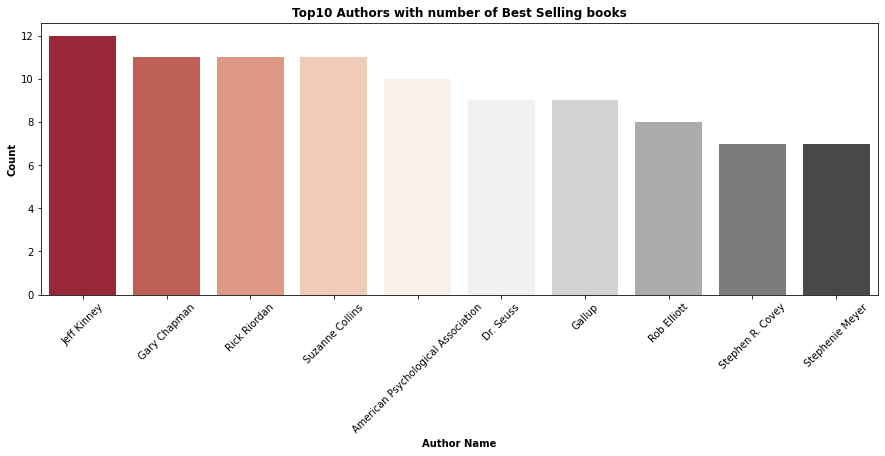

In [17]:
# Authors with number of Best Selling books - Top10

plt.figure(figsize=(15,5))
sns.barplot(x=df['Author'].value_counts().head(10).index, y=df['Author'].value_counts().head(10).values,palette="RdGy")
#df['Author'].value_counts().head(10).plot(kind='bar',color='pink')
plt.xlabel('Author Name',fontweight="bold",fontsize=10)
plt.ylabel('Count',fontweight="bold",fontsize=10)
plt.title('Top10 Authors with number of Best Selling books',fontweight="bold")
plt.xticks(rotation=45)
plt.show()

### Conclusion 

Top 10 authors with most Best Sellling books

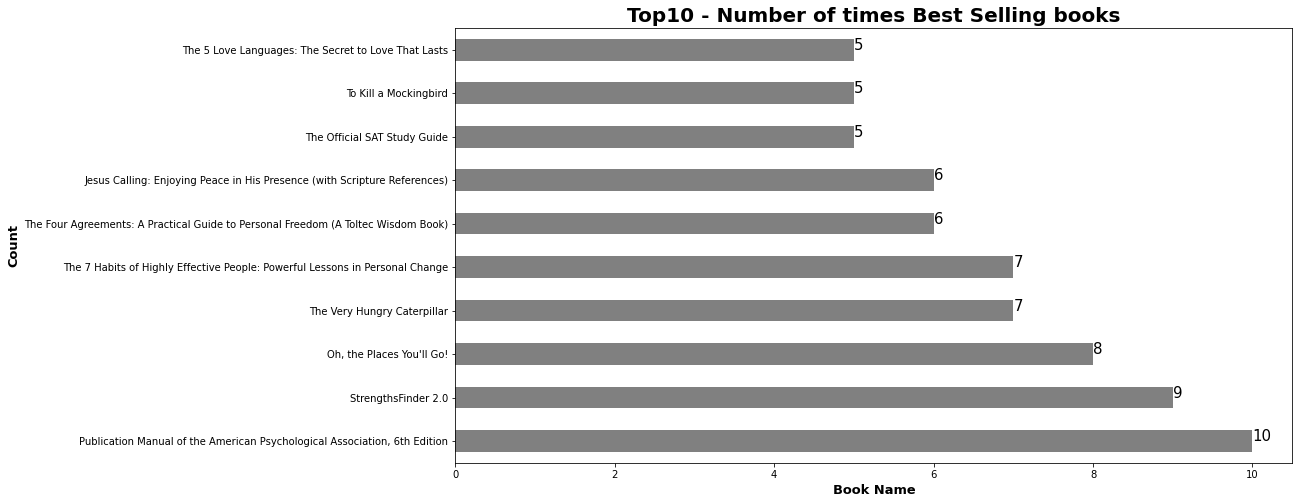

In [26]:
# Top10 - Number of times Best Selling books
plt.figure(figsize=(15,8))
df['Name'].value_counts().head(10).plot(kind='barh',color='grey')
plt.xlabel('Book Name',fontweight="bold",fontsize=13)
plt.ylabel('Count',fontweight="bold",fontsize=13)
y=df['Name'].value_counts().head(10)
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize=15)
plt.title("Top10 - Number of times Best Selling books",fontweight="bold",fontsize=20)
plt.show()

### Conclusion
"Publication Manual of the American Psychological Association, 6th Edition" has won most number of times Best selling Books.

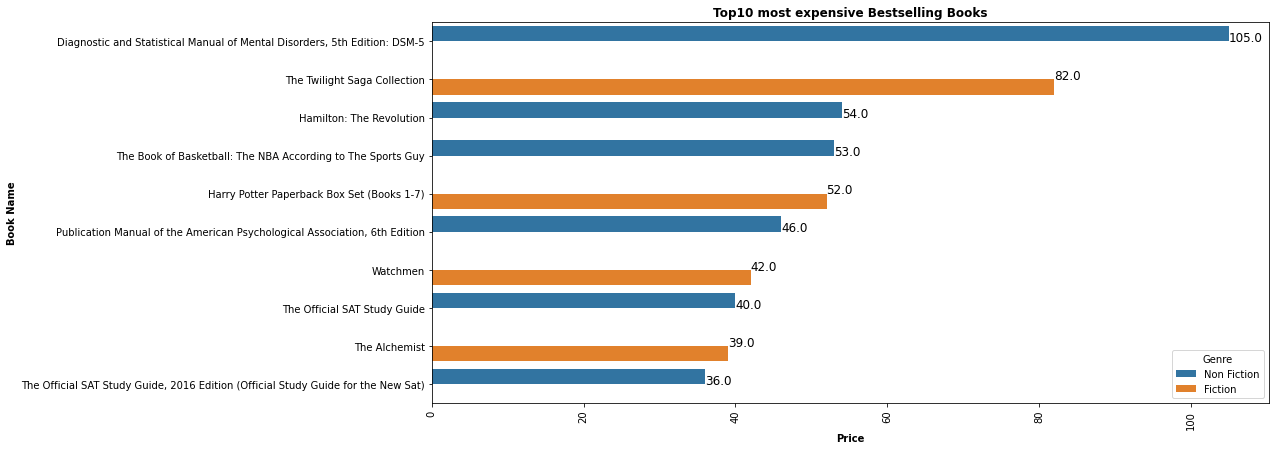

In [34]:
#Top10 most expensive Bestselling Books:
df_price = df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean()
df_price_top10 = df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean().sort_values(
    'Price', ascending=False).head(10)

plt.figure(figsize=(15,7))
sns.barplot(y='Name',x='Price',data=df_price_top10,hue='Genre')
y=df_price_top10['Price']
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title("Top10 most expensive Bestselling Books",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel('Price',fontweight="bold",fontsize=10)
plt.ylabel('Book Name',fontweight="bold",fontsize=10)
plt.show()

c:\Users\deepanshu.chakrabort\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



The mean of Price is: 13.024562474562474
The median of Price is: 11.0


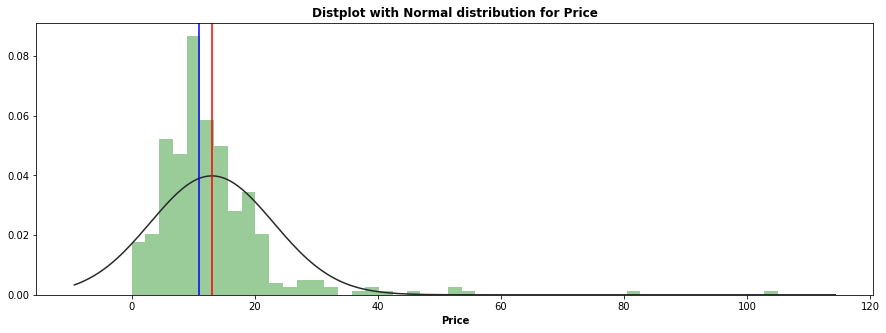

In [33]:
plt.figure(figsize=(15,5))
sns.distplot(df_price['Price'],fit=norm,kde=False,color=['green'])
plt.axvline(df_price['Price'].mean(),color='red')
plt.axvline(df_price['Price'].median(), color='blue')
plt.title('Distplot with Normal distribution for Price',fontweight="bold")
plt.xlabel('Price',fontweight="bold",fontsize=10)

print("The mean of Price is: {}".format(df_price['Price'].mean()))
print("The median of Price is: {}".format(df_price['Price'].median()))

plt.show()